# 1) Import Packages

In [2]:
# Pandas for working with dataframes
import pandas as pd
# Numpy for working with arrays
import numpy as np
# Matplotlib & Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Statsmodels for ols regression
import statsmodels.api as sm
# Diag for White and Breusch-Pagan Test
from statsmodels.stats import diagnostic as diag

#Sklearn for regression and analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

# 2) Preprocessing

In [2]:
# Load cleaned churned data into pandas dataframe
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# Inspect head of churn data
pd.set_option('display.max_columns',50)
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
# Rename columns
churn_item_cols = {'Item1': 'Timely_Response',
                         'Item2': 'Timely_Fixes',
                         'Item3': 'Timely_Replacements',
                         'Item4': 'Reliability',
                         'Item5': 'Options',
                         'Item6': 'Respectful_Response',
                         'Item7': 'Courteous_Exchange',
                         'Item8': 'Active_Listening'}

churn_df.rename(columns=churn_item_cols, inplace=True)

In [6]:
# Convert categorical (yes/no) fields to binary numeric (1/0)
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']

for i in converted_columns:
    churn_df[i] = churn_df[i].map({'Yes':1, 'No':0})

In [7]:
# Use one hot encoding and get dummy variables for categorical fields "Area", "Marital", "Gender", "Contract"
categorical_conversions = ['Area', 'Marital', 'Gender', 'Contract']
dummy_variables = ['Area_Rural', 'Area_Suburban',
                    'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                    'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
                    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year']

churn_numeric = pd.get_dummies(churn_df, columns=categorical_conversions)

In [8]:
# Create dataframe with only numeric variables
churn_numeric = churn_numeric[[
                            'Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
                            'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
                            'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
                            'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
                            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                            'Courteous_Exchange', 'Active_Listening', 'Area_Rural', 'Area_Suburban',
                            'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                            'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
                            'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year'
                            ]]

In [9]:
# Inspect dataframe to ensure that the dummy variables have been created and added correctly
churn_numeric.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,38,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,10446,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,0,1,0,1,0,0,0,1,0,0,1,0,0
2,3735,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,0,1,0,0,0,0,1,1,0,0,0,0,1
3,13863,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,11352,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,0,1,0,0,0,0,1,0,0,1,0,1,0,0


# 3. Build Initial Model

In [10]:
# Create variables for the number of observations and a list of variable names
observations = len(churn_numeric)
variables = churn_numeric.columns[:-1]

# Define independent (X) and dependent (y) variables
X = churn_numeric.drop(['Tenure'], axis=1)
y = churn_numeric['Tenure'].values

In [11]:
# Add constant to X
Xc = sm.add_constant(X)
# Create the model using ordinary least squares and fit the data
ols_model = sm.OLS(y, Xc).fit()

In [12]:
# Inspect the summary of the initial model with all variables
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.175e+04
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:07:17   Log-Likelihood:                -22535.
No. Observations:               10000   AIC:                         4.515e+04
Df Residuals:                    9958   BIC:                         4.546e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.5602      0.137    -18.621      0.000      -2.830      -2.291
Population              -1.367e-06    1.6e-06     -0.854      0.393   -4.51e-06    1.77e-06
Children                   -0.3638      0.011    -33.745      0.000      -0.385      -0.343
Age                         0.0401      0.001     35.839      0.000       0.038       0.042
Income                  -1.328e-06    8.2e-07     -1.619      0.106   -2.94e-06     2.8e-07
Churn                      -1.5833      0.071    -22.224      0.000      -1.723      -1.444
Outage_sec_perweek          0.0101      0.008      1.296      0.195      -0.005       0.025
Email                       0.0005      0.008      0.061      0.951      -0.015       0.015
Contacts                   -0.0198      0.023     -0.847      0.397      -0.066       0.026
Yearly_equip_failure       -0.0201      0.036     -0.551      0.581      -0.091       0.051
Techie                      0.0553      0.062      0.891      0.373      -0.066       0.177
Port_modem                  0.0493      0.046      1.066      0.287      -0.041       0.140
Tablet                     -0.0001      0.051     -0.003      0.998      -0.099       0.099
Phone                       0.0248      0.080      0.312      0.755      -0.131       0.181
Multiple                   -1.7800      0.067    -26.399      0.000      -1.912      -1.648
OnlineSecurity             -1.0243      0.049    -21.118      0.000      -1.119      -0.929
OnlineBackup               -1.7459      0.057    -30.519      0.000      -1.858      -1.634
DeviceProtection           -1.3332      0.050    -26.565      0.000      -1.432      -1.235
TechSupport                -0.5175      0.051    -10.168      0.000      -0.617      -0.418
StreamingTV                -3.7317      0.079    -47.524      0.000      -3.886      -3.578
StreamingMovies            -3.7685      0.091    -41.276      0.000      -3.947      -3.589
PaperlessBilling            0.0729      0.047      1.550      0.121      -0.019       0.165
MonthlyCharge               0.0316      0.001     21.623      0.000       0.029       0.035
Bandwidth_GB_Year           0.0119   1.26e-05    948.548      0.000       0.012       0.012
Timely_Response             0.0601      0.033      1.814      0.070      -0.005       0.125
Timely_Fixes               -0.0617      0.031     -1.989      0.047      -0.123      -0.001
Timely_Replacements         0.0259      0.028      0.908      0.364      -0.030       0.082
Reliability                -0.0134      0.025     -0.526      0.599      -0.063       0.037
Options                    -0.0387      0.026     -1.465      0.143      -0.091       0.013
Respectful_Response        -0.0070      0.027     -0.256      0.798      -0.060       0.046
Courteous_Exchange         -0.0043      0.026  

### Explore variables

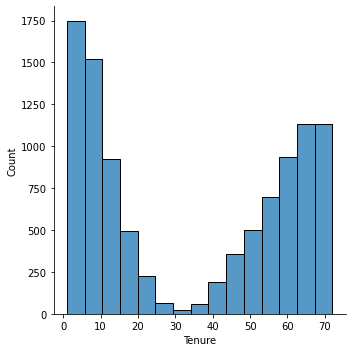

In [13]:
sns.displot(churn_numeric['Tenure'])
plt.show()

<span style="color:green">***Bimodal distribution of Tenure data***</span>

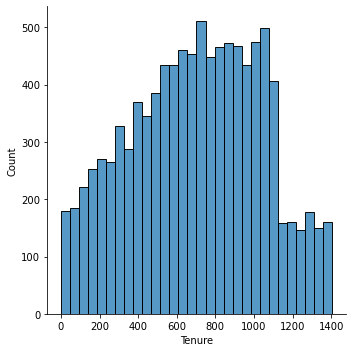

The sum of squared errors for Tenure is 6991663.0


In [14]:
# Visualize sum of squared errors for Tenure with histogram

squared_errors = (churn_numeric['Tenure'] - np.mean(churn_numeric['Tenure']))**2
sns.displot(squared_errors)
plt.show()
print('The sum of squared errors for Tenure is '+str(sum(round(squared_errors),1)))

# 4. Feature Selection for Reduced Model
Correlation or Mutual Information?

### Correlation

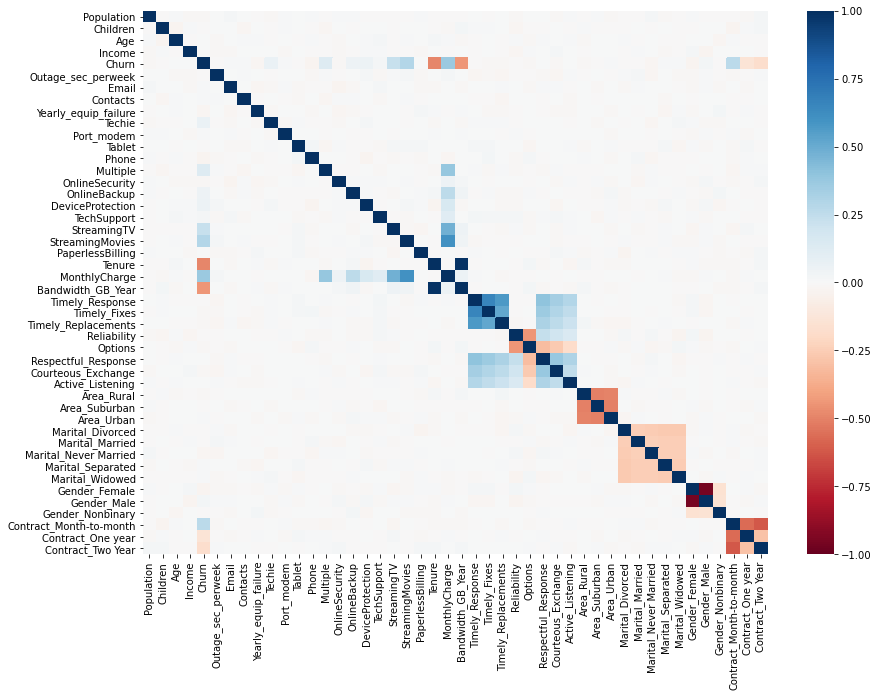

In [15]:
# Use correlation matrix to explore correlation between variables

churn_numeric.astype(float)

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(churn_numeric.corr(), cmap='RdBu', vmin=-1, vmax=1)
plt.show()

In [16]:
# List the r-values of each potential independent variable and the dependent variable (Tenure)

for col in churn_numeric:
    print(col)
    print((str(round(churn_numeric[col].corr(churn_numeric['Tenure']),3))))
    print('-'*25)

Population
-0.004
-------------------------
Children
-0.005
-------------------------
Age
0.017
-------------------------
Income
0.002
-------------------------
Churn
-0.485
-------------------------
Outage_sec_perweek
0.003
-------------------------
Email
-0.014
-------------------------
Contacts
0.003
-------------------------
Yearly_equip_failure
0.012
-------------------------
Techie
-0.01
-------------------------
Port_modem
0.009
-------------------------
Tablet
0.001
-------------------------
Phone
0.003
-------------------------
Multiple
-0.01
-------------------------
OnlineSecurity
0.003
-------------------------
OnlineBackup
0.021
-------------------------
DeviceProtection
-0.028
-------------------------
TechSupport
-0.001
-------------------------
StreamingTV
0.002
-------------------------
StreamingMovies
-0.003
-------------------------
PaperlessBilling
-0.001
-------------------------
Tenure
1.0
-------------------------
MonthlyCharge
-0.003
-------------------------
Ba

### Inspecting Standardized Coefficients

In [17]:
# Import linear_model
from sklearn import linear_model

linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [18]:
# Import scaling and pipeline packages
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Define standard scaler
standardization = StandardScaler()
# Create pipeline for standardization and regression
Stand_coef_linear_reg = make_pipeline(standardization, linear_regression)

In [19]:
# Perform regression and fit independent and dependent variables
linear_regression.fit(X, y)
# Print absolute values of coefficients of the linear regression model, sorted descending order
for coef, var in sorted(zip(map(abs,linear_regression.coef_), churn_numeric.columns[:-1]), reverse=True):
    print("%6.3f %s" % (coef,var))

 3.768 StreamingMovies
 3.732 StreamingTV
 1.780 Multiple
 1.746 OnlineBackup
 1.583 Churn
 1.333 DeviceProtection
 1.024 OnlineSecurity
 0.617 Gender_Female
 0.518 TechSupport
 0.446 Gender_Male
 0.364 Children
 0.267 Gender_Nonbinary
 0.171 Marital_Widowed
 0.137 Contract_One year
 0.131 Contract_Month-to-month
 0.098 Area_Urban
 0.095 Marital_Separated
 0.073 PaperlessBilling
 0.062 Timely_Response
 0.060 Bandwidth_GB_Year
 0.056 Courteous_Exchange
 0.055 Techie
 0.049 Port_modem
 0.046 Marital_Never Married
 0.040 Age
 0.039 Reliability
 0.034 Marital_Divorced
 0.032 Tenure
 0.031 Area_Rural
 0.026 Timely_Fixes
 0.025 Active_Listening
 0.025 Phone
 0.020 Yearly_equip_failure
 0.020 Contacts
 0.013 Timely_Replacements
 0.012 MonthlyCharge
 0.010 Outage_sec_perweek
 0.008 Marital_Married
 0.007 Options
 0.006 Area_Suburban
 0.004 Respectful_Response
 0.000 Email
 0.000 Tablet
 0.000 Population
 0.000 Income


In [21]:
# Use created pipeline to perform regression and fit standardized independent and dependent variables
Stand_coef_linear_reg.fit(X.drop(dummy_variables, axis=1),y)
# Print absolute values of coefficients of the standardized linear regression model, sorted descending order
for coef, var in sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), churn_numeric.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

26.129 MonthlyCharge
 1.913 StreamingMovies
 1.896 StreamingTV
 1.364 Tenure
 0.903 Multiple
 0.868 OnlineBackup
 0.827 Age
 0.788 Children
 0.673 DeviceProtection
 0.627 Churn
 0.500 OnlineSecurity
 0.247 TechSupport
 0.074 Bandwidth_GB_Year
 0.057 Timely_Response
 0.055 Courteous_Exchange
 0.037 PaperlessBilling
 0.032 Reliability
 0.028 Income
 0.024 Outage_sec_perweek
 0.022 Contacts
 0.021 Techie
 0.020 Port_modem
 0.018 Population
 0.017 Timely_Fixes
 0.012 Yearly_equip_failure
 0.011 Options
 0.009 Respectful_Response
 0.005 Phone
 0.003 Email
 0.002 Tablet
 0.001 Timely_Replacements


In [23]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f' %  r2_est(X,y))

Baseline R2: 0.992


<span style="color:green">***Baseline r2 of .992 is very high***</span>

In [24]:
# Print estimated r2 scores of each variable
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) -r2_est(X.values[:,selection],y)) ,churn_numeric.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname))

 0.686 MonthlyCharge
 0.002 StreamingTV
 0.001 StreamingMovies
 0.001 Age
 0.001 Children
 0.001 OnlineBackup
 0.001 DeviceProtection
 0.001 Multiple
 0.000 Churn
 0.000 Tenure
 0.000 OnlineSecurity
 0.000 TechSupport
 0.000 Courteous_Exchange
 0.000 Timely_Response
 0.000 Bandwidth_GB_Year
 0.000 Income
 0.000 PaperlessBilling
 0.000 Reliability
 0.000 Outage_sec_perweek
 0.000 Port_modem
 0.000 Timely_Fixes
 0.000 Techie
 0.000 Population
 0.000 Contacts
 0.000 Yearly_equip_failure
 0.000 Timely_Replacements
 0.000 Phone
 0.000 Options
 0.000 Respectful_Response
 0.000 Email
 0.000 Tablet
 0.000 Marital_Widowed
 0.000 Marital_Separated
 0.000 Marital_Never Married
 0.000 Marital_Married
 0.000 Marital_Divorced
 0.000 Gender_Nonbinary
 0.000 Gender_Male
 0.000 Gender_Female
 0.000 Contract_One year
 0.000 Contract_Month-to-month
 0.000 Area_Urban
 0.000 Area_Suburban
 0.000 Area_Rural
 0.000 Active_Listening


### Select Independent Variables

In [26]:
reduced_variables = churn_numeric[['Bandwidth_GB_Year', 'MonthlyCharge', 'DeviceProtection', 'Options', 'Tenure']]

### Visualize Independent to Dependent Variable Relationships

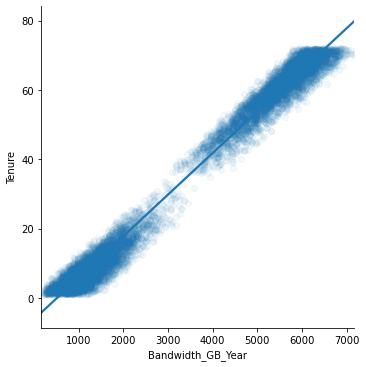

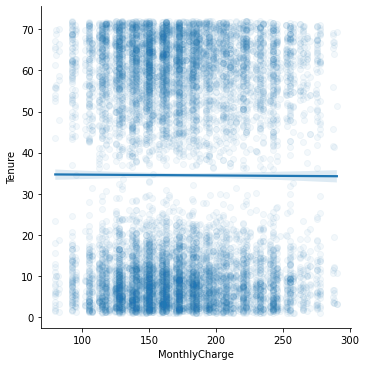

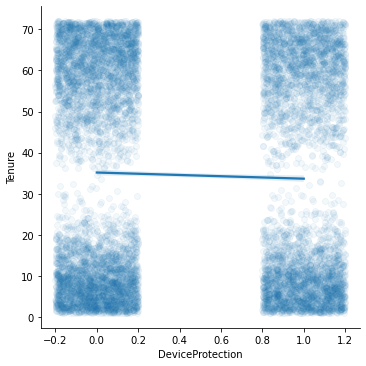

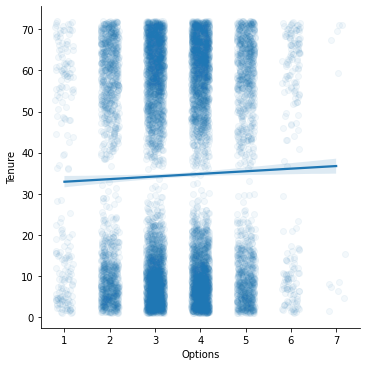

In [27]:
reduced_variables_list = reduced_variables.columns
for col in reduced_variables_list:
    if col != 'Tenure':
        sns.lmplot(x=col, y='Tenure', data=churn_numeric, scatter_kws={'alpha':0.05}, x_jitter=0.2)
plt.show()

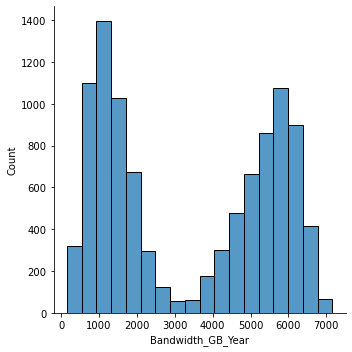

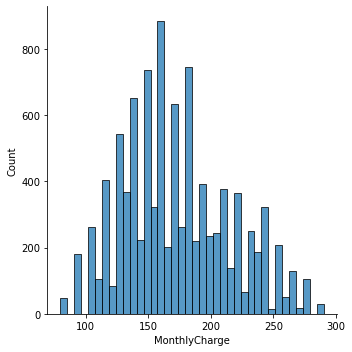

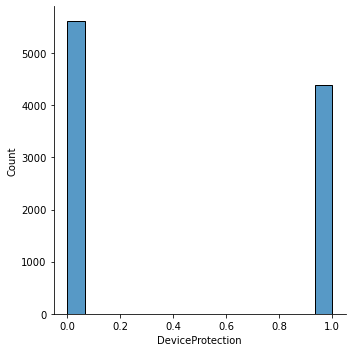

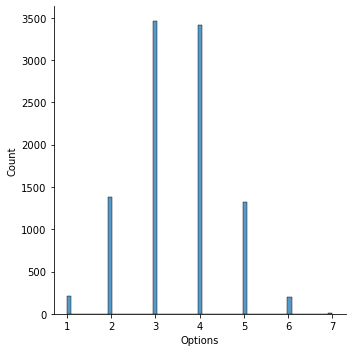

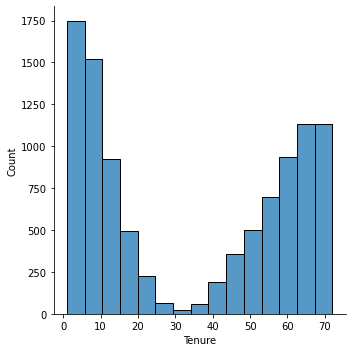

In [28]:
for col in reduced_variables_list:
    sns.displot(churn_numeric[col])
plt.show()

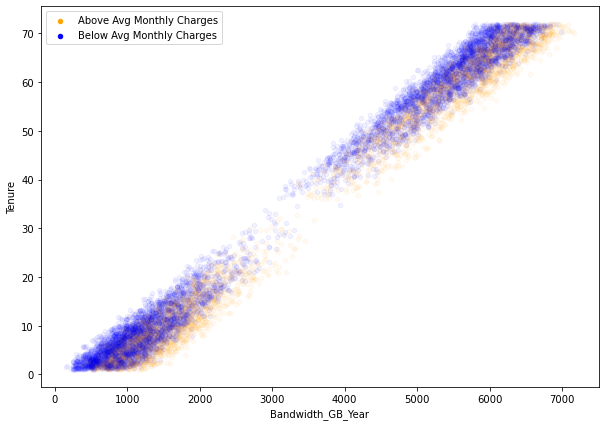

In [29]:
fig, ax = plt.subplots(figsize=(10,7))

high_mon_charge = churn_numeric[churn_numeric['MonthlyCharge'] >= np.mean(churn_numeric['MonthlyCharge'])]
low_mon_charge = churn_numeric[churn_numeric['MonthlyCharge'] < np.mean(churn_numeric['MonthlyCharge'])]

high_mon_charge.plot(kind='scatter', x='Bandwidth_GB_Year', y='Tenure', color='orange', ax=ax, alpha=0.05, label='Above Avg Monthly Charges')
low_mon_charge.plot(kind='scatter',x='Bandwidth_GB_Year', y='Tenure', color='blue', ax=ax, alpha=0.05, label='Below Avg Monthly Charges')
leg = plt.legend()    
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

<span style="color:green">***Bandwidth_GB_Year appears to have a relationship with MonthlyCharges, but no strong correlation to Tenure***</span>

In [30]:
# Remove MonthlyCharge from list of independent variables

reduced_variables = reduced_variables.drop('MonthlyCharge', axis=1)
reduced_variables_list = reduced_variables.columns

### Further investigate distribution of variables

In [31]:
# Store describe info from reduced variables
reduced_desc = reduced_variables.describe()

# Append two index rows that define outlier ranges as + or - 3 standard deviations from the mean
reduced_desc.loc['+3_std'] = reduced_desc.loc['mean'] + (reduced_desc.loc['std'] * 3)
reduced_desc.loc['-3_std'] = reduced_desc.loc['mean'] - (reduced_desc.loc['std'] * 3)

# Print new describe
reduced_desc

,Bandwidth_GB_Year,DeviceProtection,Options,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3392.341550,0.438600,3.492900,34.526188
std,2185.294852,0.496241,1.024819,26.443063
min,155.506715,0.000000,1.000000,1.000259
25%,1236.470827,0.000000,3.000000,7.917694
50%,3279.536903,0.000000,3.000000,35.430507
75%,5586.141370,1.000000,4.000000,61.479795
max,7158.981530,1.000000,7.000000,71.999280
+3_std,9948.226107,1.927322,6.567358,113.855376
-3_std,-3163.543008,-1.050122,0.418442,-44.803000


<span style="color:green">***No significant outliers appear to be present***</span>

# 5. Reduced Variable Model

In [32]:
# Define independent variables
X_reduced = reduced_variables.drop('Tenure', axis = 1)
y = reduced_variables['Tenure'].values

# Add constant
Xc_reduced = sm.add_constant(X_reduced)
# Run and fit model
ols_reduced = sm.OLS(y, Xc_reduced).fit()

# Evaluating Reduced Model

In [33]:
# Return params intercept (const) and coefficients of features (independent variables)
ols_reduced.params

const               -5.674203
Bandwidth_GB_Year    0.011996
DeviceProtection    -1.083036
Options             -0.005155
dtype: float64

In [34]:
# Perform regression and fit independent and dependent variables
Stand_coef_linear_reg.fit(X_reduced,y)

# Print absolute values of coefficients of the linear regression model, sorted descending order
for coef, var in sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), reduced_variables.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

26.213 Bandwidth_GB_Year
 0.537 DeviceProtection
 0.005 Options


In [35]:
# Return baseline r-squred score
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f' %  r2_est(X,y))

Baseline R2: 0.992


In [36]:
# Investigate impact of features on r-squared
r2_impact = list()
for j in range(X_reduced.shape[1]):
    selection = [i for i in range(X_reduced.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X_reduced,y) -
    r2_est(X_reduced.values[:,selection],y)), reduced_variables.columns[j]))
# Return r-squared impact with variable name
for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname))

 0.982 Bandwidth_GB_Year
 0.000 DeviceProtection
 0.000 Options


In [37]:
# Print summary statistics of the reduced ols model
ols_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.983e+05
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:17:10   Log-Likelihood:                -26424.
No. Observations:               10000   AIC:                         5.286e+04
Df Residuals:                    9996   BIC:                         5.289e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.6742      0.134    -42.326      0.000      -5.937      -5.411
Bandwidth_GB_Year     0.0120   1.56e-05    770.772      0.000       0.012       0.012
DeviceProtection     -1.0830      0.069    -15.807      0.000      -1.217      -0.949
Options              -0.0052      0.033     -0.155      0.877      -0.070       0.060
==============================================================================
Omnibus:                      321.350   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.717
Skew:                          -0.311   Prob(JB):                     2.96e-56
Kurtosis:                       2.524   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#Print parameters (also in summary above)
ols_reduced.params

const               -5.674203
Bandwidth_GB_Year    0.011996
DeviceProtection    -1.083036
Options             -0.005155
dtype: float64

In [39]:
# Print p-values (also in summary above)
print(ols_reduced.pvalues)

const                0.000000e+00
Bandwidth_GB_Year    0.000000e+00
DeviceProtection     1.301550e-55
Options              8.765589e-01
dtype: float64


# Evaluating Reduced Model

Check for the following:

    1. No multicollinearity
    2. Homoscedasticity
    3. No autocorrelation
    4. Normal distribution of residuals

### 1. Multicollinearity Check

#### Check eigenvalues & eigenvectors

In [40]:
# Calculate correlation coefficients
corr = np.corrcoef(reduced_variables, rowvar=0)

# Use np.linalg.eig with correlation coefficients to calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(corr)

# Use for loop to list column name, eigenvalue, and eigenvector
for col, eig, eig_vec in zip(reduced_variables, eigenvalues, eigenvectors[:,0]):
    print(col)
    print(eig)
    print(eig_vec)
    print('-'*25)

Bandwidth_GB_Year
1.9933844183973477
-0.7063122419228631
-------------------------
DeviceProtection
0.008297758450255372
0.02544851796386113
-------------------------
Options
0.9944762952828683
-0.03526818210776415
-------------------------
Tenure
1.0038415278695285
-0.706563192626219
-------------------------


<span style="color:green">**Bandwidth_GB_Year has high collinearity**</span>

### 2. Heteroscedasticity Check

#### White and Breusch-Pagan Test

Both the p values and f values of both the White and Breusch-Pagan test are higher than 0.05 so we reject the hypothesis that there is heteroscedasticity and accept the null-hypothesis. The residuals/ errors for the data are random.

In [41]:
_, pval, _, f_pval = diag.het_white(ols_reduced.resid, ols_reduced.model.exog)

print(pval, f_pval)
print('-'*100)

_, pval, _, f_pval = diag.het_breuschpagan(ols_reduced.resid, ols_reduced.model.exog)
print(pval, f_pval)

1.352240420711961e-13 1.2004905759123607e-13
----------------------------------------------------------------------------------------------------
1.9982648741339424e-06 1.9670121136919994e-06


### 3. Autocorrelation Check

#### Perform ljunb-box test and create tsa plot

In [42]:
# calculate lag
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# perform ljung-box test
test_results = diag.acorr_ljungbox(ols_reduced.resid, lags=lag, return_df=False)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

if min(p_val) > 0.05:
    print('The lowest p-value found was {:.4}'.format(min(p_val)))
    print('We fail to reject the null hypothesis, so there is no autocorrelation')
    print('-'*100)

else:
    print('The lowest p-value was found was {:.4}'.format(min(p_val)))
    print('We reject the null hypothesis, so there is autocorrelation')
    print('-'*100)

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value was found was 6.268e-05
We reject the null hypothesis, so there is autocorrelation
----------------------------------------------------------------------------------------------------


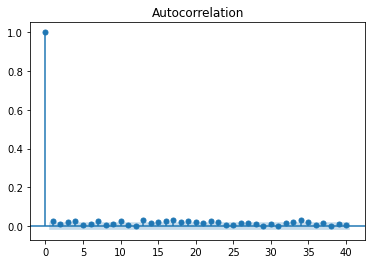

In [43]:
# Plot autocorrelation
sm.graphics.tsa.plot_acf(ols_reduced.resid)
plt.show()

### 4. Normal Distribution of Residuals Check

#### Graph residuals for verification of normal distribution

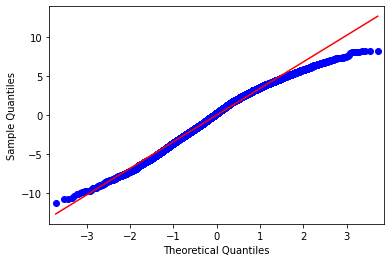

In [44]:
# check for normality of residuals
sm.qqplot(ols_reduced.resid, line = 's')
plt.show()

In [46]:
# mean of residuals are close to zero

mean_residuals = sum(ols_reduced.resid) / len(ols_reduced.resid)
mean_residuals

-9.292762115364894e-14

<span style="color:green">**P-values are all very small, indicating that we can reject the null hypothesis**</span>

# Summary 

The r squared of the reduced model is high, f-score is high, and the p-value is low, however there appears to be multicollinearity and autocorrelation affecting the models ability to accurately predict on the dependent variable. 

## References
------------------------------------------------

**Multiple Regression - TowardDataScience.com**

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

------------------------------------------------

**Multiple Regression - Sigma Coding**

https://www.youtube.com/watch?v=M32ghIt1c88
https://www.youtube.com/watch?v=8DhvVs59It4
https://www.youtube.com/watch?v=YQf23JYX3Zw
https://www.youtube.com/watch?v=UTfoj_7RU48
https://www.youtube.com/watch?v=j1sjqEStECQ

------------------------------------------------

**Tsa Plots - Statsmodels.org**

https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html

------------------------------------------------

**Seaborn Displots - Seaborn.pydata.org**

https://seaborn.pydata.org/generated/seaborn.displot.html

------------------------------------------------

**One hot encoding - TowardDataScience.com**

https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b